In [1]:
import statsmodels.api as sm

In [2]:
def getMonth(index):
    return pd.datetime.strftime(index,'%m')

In [3]:
# set elevations
elevations = {'Vcm':3003.0,'Jemez RAWS':2514.0}

In [6]:
delz = elevations['Vcm'] - elevations['Jemez RAWS']

In [7]:
delz

489.0

In [8]:
lapse = pd.read_pickle('./data/jemez_vcm_lapse.pcl') # load the monthly lapse rates
jemez = pd.read_pickle('./data/Jemez_raws_wy2003_2015.pcl') # load the met data
mod1 = sm.load('./data/rain_duration_model.mod') # load the precip amount, rain duration model

In [9]:
jemez['month'] = jemez.index.map(getMonth) # compute months

In [10]:
## Generate the Vcm_tmin
def gen_tmin(df):
    m = df['month']
    lr = lapse.loc[m,'tmin']
    return (df['Tmin'] + (delz * lr))

def gen_tave(df):
    m = df['month']
    lr = lapse.loc[m,'tave']
    return (df['Tave'] + (delz * lr))
    
def gen_tmax(df):
    m = df['month']
    lr = lapse.loc[m,'tmax']
    return (df['Tmax'] + (delz * lr))
    
def gen_p(df):
    m = df['month']
    lr = lapse.loc[m,'Pclean']
    return (df['P'] + (delz * lr))

In [11]:
jemez['Vcm_tmin'] = jemez.apply(gen_tmin,axis=1)
jemez['Vcm_tave'] = jemez.apply(gen_tave,axis=1)
jemez['Vcm_tmax'] = jemez.apply(gen_tmax,axis=1)
jemez['Vcm_p'] = jemez.apply(gen_p,axis=1)

In [12]:
jemez.loc[jemez.Vcm_p<0,'Vcm_p'] = 0

In [13]:
jemez['Vcm_rain_duration'] = (jemez.Vcm_p*mod1.params['P'])+((jemez.Vcm_p**2)*mod1.params['P2'])+mod1.params['Intercept']

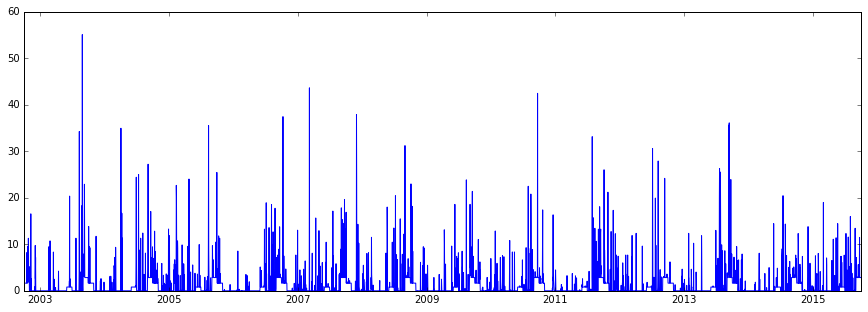

In [14]:
plt.figure(figsize=(15,5))
plt.plot(jemez.index,jemez.Vcm_p)

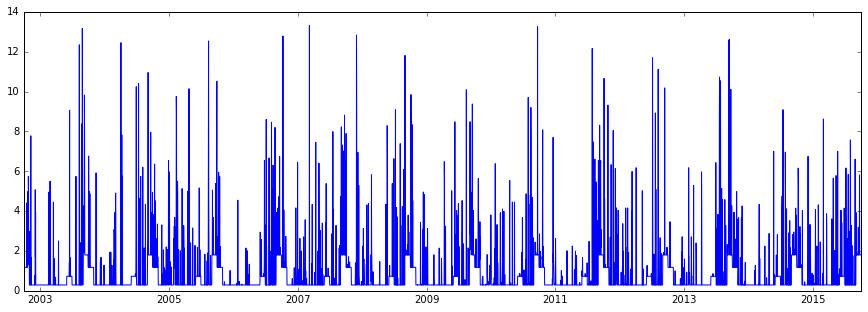

In [15]:
plt.figure(figsize=(15,5))
plt.plot(jemez.index,jemez.Vcm_rain_duration)

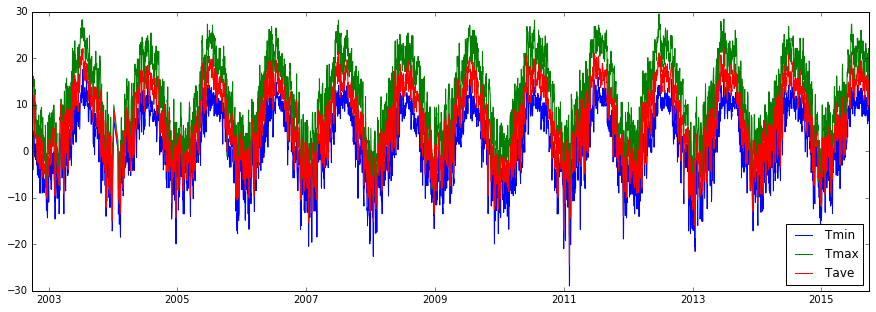

In [16]:
plt.figure(figsize=(15,5))
plt.plot(jemez.index,jemez.Vcm_tmin,label = 'Tmin')
plt.plot(jemez.index,jemez.Vcm_tmax,label = 'Tmax')
plt.plot(jemez.index,jemez.Vcm_tave,label = 'Tave')
plt.legend(loc='lower right')

In [17]:
jemez = jemez.loc['2005-01-01':'2012-12-31'] # cut the data to start the year after a leap year and go through a leap year

In [24]:
td = (jemez.index.max()-jemez.index.min())
years = td.days/365.

In [28]:
strt = '2005-01-01'
n = 100
length = n*years
print '%s years'%length
m = len(jemez)
end = pd.datetime.strptime(strt,'%Y-%m-%d')+pd.datetools.timedelta(n*m)
print end.date()

800.273972603 years
2805-01-07


In [15]:
print jemez.index.min()
print jemez.index.max()

2002-10-01 00:00:00
2015-09-30 00:00:00


In [29]:
head = '2005 1 1'

np.savetxt('/RHESSys/jemez/clim/Vcm_su.tmax',np.tile(jemez.Vcm_tmax.as_matrix(),n),fmt = '%f', comments='',header=head)
np.savetxt('/RHESSys/jemez/clim/Vcm_su.tmin',np.tile(jemez.Vcm_tmin.as_matrix(),n),fmt = '%f', comments='',header=head)
np.savetxt('/RHESSys/jemez/clim/Vcm_su.tavg',np.tile(jemez.Vcm_tave.as_matrix(),n),fmt = '%f', comments='',header=head)
np.savetxt('/RHESSys/jemez/clim/Vcm_su.rain',np.tile(jemez.Vcm_p.as_matrix()/1000.,n),fmt = '%f', comments='',header=head)
np.savetxt('/RHESSys/jemez/clim/Vcm_su.daytime_rain_duration',np.tile(jemez.Vcm_rain_duration.as_matrix(),n),fmt = '%f', comments='',header=head)